# Importing Data and Downloading Libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import folium
from folium.plugins import HeatMap
import itertools
from prophet import Prophet
import xgboost as xgb
from sklearn.model_selection import train_test_split
from math import radians, sin, cos, sqrt, asin
import pytz

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import opendatasets as od
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
from sklearn import preprocessing
from datetime import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE


In [4]:
od.download("https://www.kaggle.com/datasets/yasserh/uber-fares-dataset")
os.chdir('/content/uber-fares-dataset')
uber_df = pd.read_csv("uber.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 7.04M/7.04M [00:00<00:00, 50.4MB/s]

**username:** blakeandersonw

**key:** 5c7b7542c5ad7af0d6015b98bfa868b4

Demand P2

# Demand

In [5]:
uber_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Linear Regression R-squared (Validation): 0.3036
Decision Tree R-squared (Validation): -0.0673
Random Forest R-squared (Validation): 0.3909
XGBoost R-squared (Validation): 0.5122
Results on test set:
Linear Regression R-squared: 0.3062
Decision Tree R-squared: -0.0500
Random Forest R-squared: 0.4009
XGBoost R-squared: 0.5131


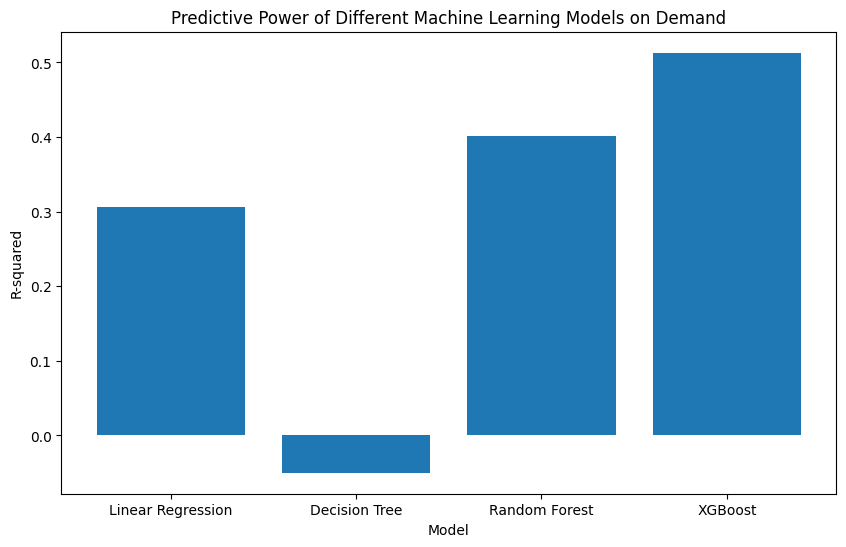

In [6]:
# Assuming you've already loaded the dataset and processed the datetime column

df = uber_df.copy()

drop = ["Unnamed: 0", "key", "fare_amount", "passenger_count"]
df.drop(drop, inplace=True, axis=1)

# Create features for hour, day, day of the week, and month
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['Hour'] = df['pickup_datetime'].dt.hour
df['DayOfWeek'] = df['pickup_datetime'].dt.dayofweek
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['HourGroup'] = df['Hour'] // 4

# Create ride count per hour
ride_counts = df.groupby(['HourGroup', 'DayOfWeek', 'Month', 'Day']).size().reset_index(name='RideCount')

# Split the dataset into training, validation, and testing sets
X = ride_counts[['HourGroup', 'DayOfWeek', 'Month', 'Day']]
y = ride_counts['RideCount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Train the models
models = {'Linear Regression': LinearRegression(),
          'Decision Tree': DecisionTreeRegressor(random_state=42),
          'Random Forest': RandomForestRegressor(random_state=42),
          'XGBoost': XGBRegressor(random_state=42)}

for name, demand_model in models.items():
    demand_model.fit(X_train, y_train)
    y_pred_val = demand_model.predict(X_val)
    r2_val = r2_score(y_val, y_pred_val)
    print(f"{name} R-squared (Validation): {r2_val:.4f}")

print("Results on test set:")
for name, demand_model in models.items():
    y_test_pred = demand_model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"{name} R-squared: {r2_test:.4f}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models.keys(), [r2_score(y_test, model.predict(X_test)) for model in models.values()])
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
ax.set_title('Predictive Power of Different Machine Learning Models on Demand')
plt.show()

In [8]:
df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Hour,DayOfWeek,Month,Day,HourGroup
0,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,19,3,5,7,4
1,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,20,4,7,17,5
2,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,21,0,8,24,5
3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,8,4,6,26,2
4,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,17,3,8,28,4
...,...,...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,10,6,10,28,2
199996,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,4,3,14,0
199997,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,0,0,6,29,0
199998,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,14,2,5,20,3


In [9]:
demand_model = XGBRegressor(random_state=42)
demand_model.fit(X_train, y_train)

def predict_ride_count(hourgroup, day_of_week, month, day):
    # Create a dataframe with the input values
    input_df = pd.DataFrame({
        'HourGroup': [hourgroup],
        'DayOfWeek': [day_of_week],
        'Month': [month],
        'Day': [day]
    })

    # Use the XGBoost model to make a prediction
    prediction = demand_model.predict(input_df)[0]

    return prediction

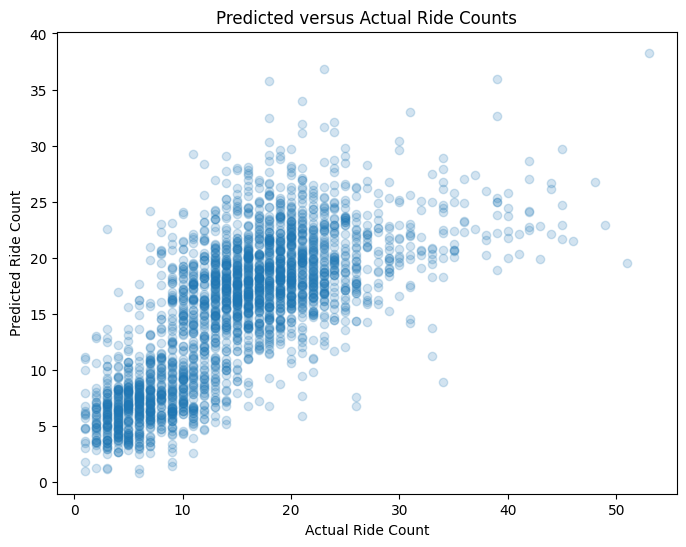

In [10]:
y_pred = []
for row in X_test.itertuples():
    y_pred.append(predict_ride_count(row.HourGroup, row.DayOfWeek, row.Month, row.Day))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Actual Ride Count")
plt.ylabel("Predicted Ride Count")
plt.title("Predicted versus Actual Ride Counts")
plt.show()


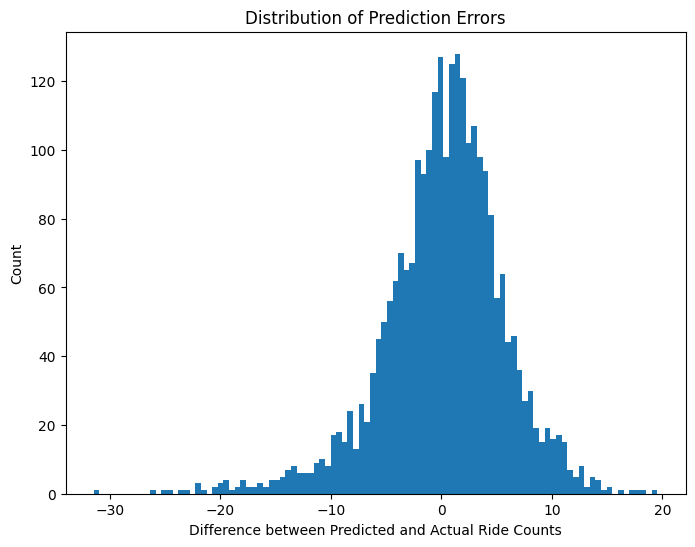

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(np.array(y_pred) - np.array(y_test), bins=100)
plt.xlabel("Difference between Predicted and Actual Ride Counts")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()


Text(0.5, 1.0, 'Residuals vs. Fitted Values')

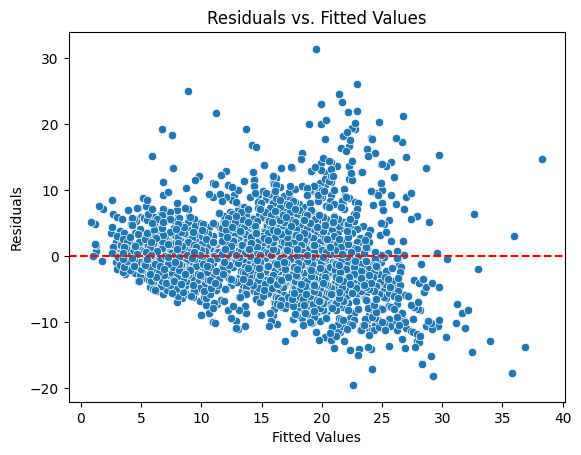

In [13]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')


<ipython-input-14-af75d497cb9d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


Text(0.5, 1.0, 'Density Plot of Residuals')

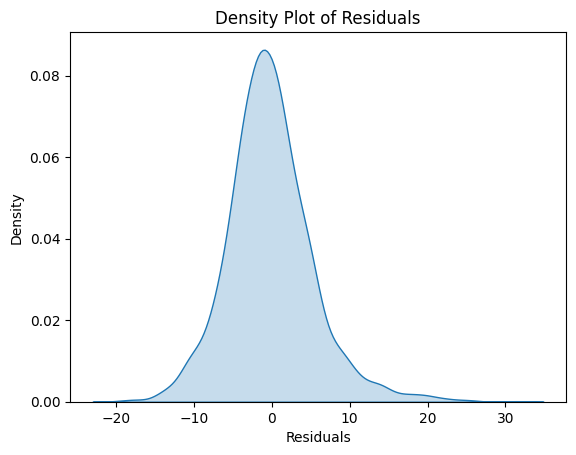

In [14]:
sns.kdeplot(residuals, shade=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')


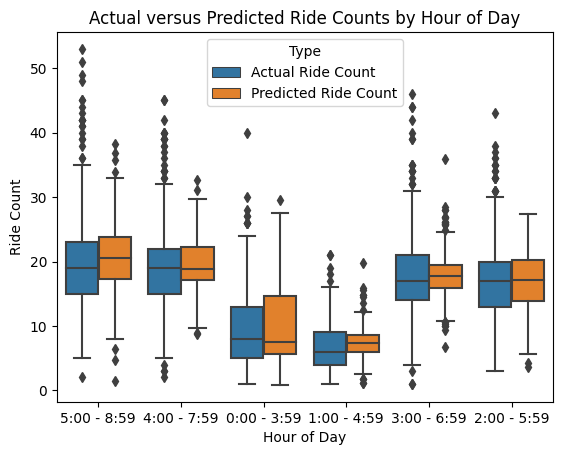

In [15]:
df_eval = X_test.copy()
df_eval['Actual Ride Count'] = y_test
df_eval['Predicted Ride Count'] = y_pred
df_eval['HourGroup'] = df_eval['HourGroup'].apply(lambda x: str(x) + ':00 - ' + str(x+3) + ':59')
sns.boxplot(x='HourGroup', y='Ride Count', hue='Type', data=pd.melt(df_eval, id_vars=['HourGroup'], value_vars=['Actual Ride Count', 'Predicted Ride Count'], var_name='Type', value_name='Ride Count'))
plt.xlabel('Hour of Day')
plt.ylabel('Ride Count')
plt.title('Actual versus Predicted Ride Counts by Hour of Day')
plt.show()


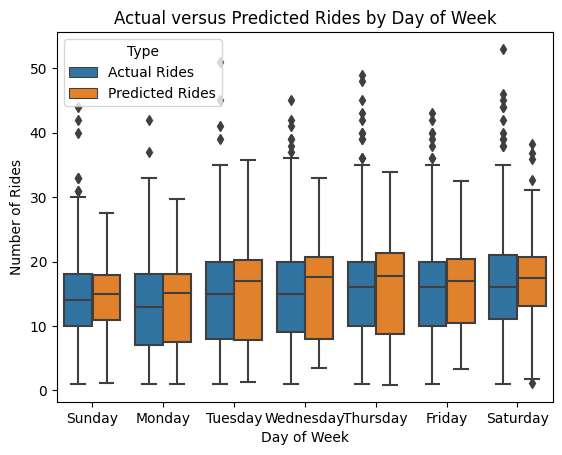

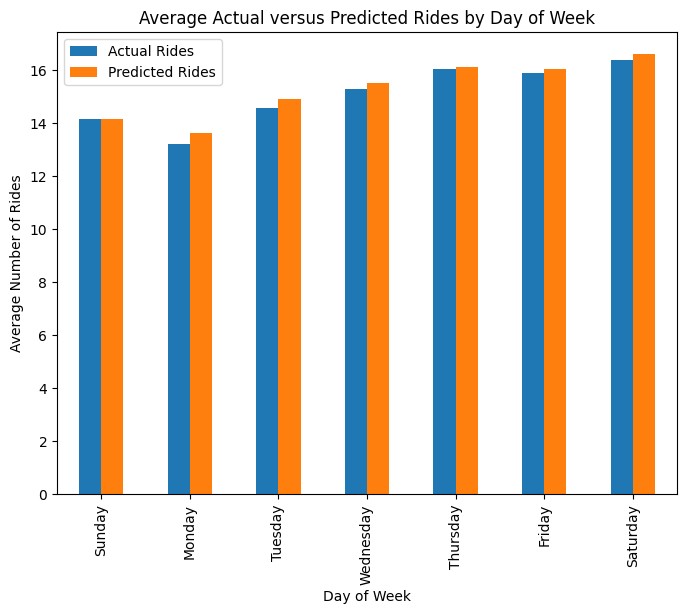

In [16]:
# Create a dataframe to hold the evaluation data
df_eval = X_test.copy()
df_eval['Actual Rides'] = y_test
df_eval['Predicted Rides'] = y_pred

# Define the order of days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot actual versus predicted rides by day of the week
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_eval['DayOfWeek'] = df_eval['DayOfWeek'].map(day_names)
sns.boxplot(x='DayOfWeek', y='Rides', hue='Type', data=pd.melt(df_eval, id_vars=['DayOfWeek'], value_vars=['Actual Rides', 'Predicted Rides'], var_name='Type', value_name='Rides'), order=day_order)
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.title('Actual versus Predicted Rides by Day of Week')
plt.show()

# Plot the average actual and predicted rides by day of the week
df_eval.groupby('DayOfWeek')[['Actual Rides', 'Predicted Rides']].mean().loc[day_order].plot(kind='bar', figsize=(8, 6))
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Rides')
plt.title('Average Actual versus Predicted Rides by Day of Week')
plt.show()


In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

def evaluate_predictions(demand_model, X_test, y_test):
    # Use the model to make predictions on the test set


    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the root mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    mdae = median_absolute_error(y_test, y_pred)
    # Print the results
    print(f"R-squared score: {r2:.4f}")
    print(f"Mean absolute error: {mae:.4f}")
    print(f"Mean squared error: {mse:.4f}")
    print(f"Root mean squared error: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"MDAE: {mdae:.4f}")

In [ ]:
evaluate_predictions(demand_model, X_test, y_test)

In [19]:
ride_counts['Pred_RideCount'] = ride_counts.apply(lambda x: predict_ride_count(x['HourGroup'], x['DayOfWeek'], x['Month'], x['Day']), axis=1)

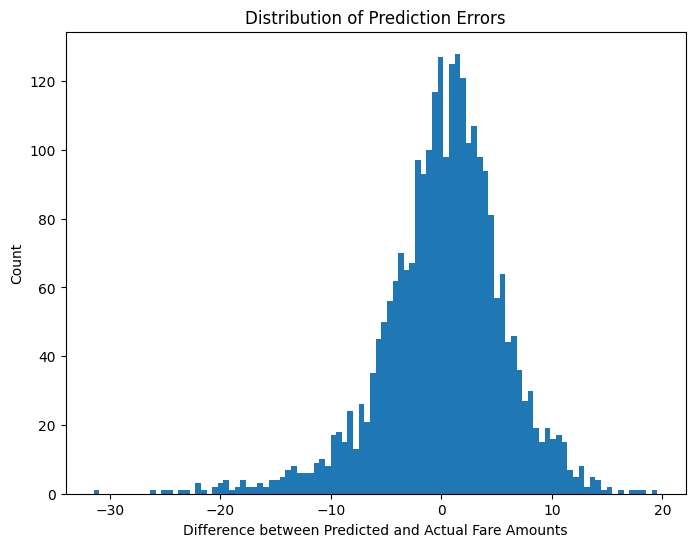

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred - y_test, bins=100)
plt.xlabel("Difference between Predicted and Actual Fare Amounts")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()

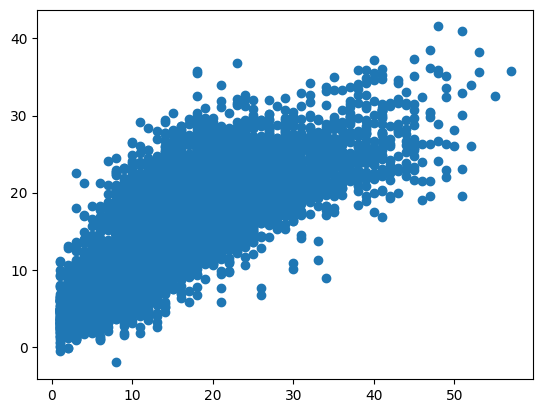

In [21]:
plt.scatter(ride_counts['RideCount'], ride_counts['Pred_RideCount'])

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

def evaluate_predict_ride_count(hourgroup, day_of_week, month, day, X_test, y_test, demand_model):
    # Make a prediction for the input values
    prediction = predict_ride_count(hourgroup, day_of_week, month, day)

    # Get the actual ride count from the test set
    actual = y_test.iloc[X_test[(X_test['HourGroup'] == hourgroup) & 
                                (X_test['DayOfWeek'] == day_of_week) & 
                                (X_test['Month'] == month) & 
                                (X_test['Day'] == day)].index[0]]

    # Calculate the mean absolute error and R-squared
    mae = mean_absolute_error([actual], [prediction])
    r2 = r2_score([actual], [prediction])

    # Print the results
    print(f"Actual ride count: {actual:.4f}")
    print(f"Predicted ride count: {prediction:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

# Revenue

In [23]:
df = uber_df.copy()

In [24]:
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [25]:
df['distance'] = distance(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )

In [26]:
def haversine_distance(row):
    """
    Calculate the great circle distance between two points
    on the Earth (specified in decimal degrees)
    """
    # unpack the values from the row
    lat1, lon1, lat2, lon2 = row[['pickup_latitude', 'pickup_longitude',
                                  'dropoff_latitude', 'dropoff_longitude']]
    
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3959 for miles
    return c * r

# Apply the function to the DataFrame and assign the result to a new column
df['distance'] = df.apply(haversine_distance, axis=1)

In [27]:
# Determine the quantiles that correspond to the top 5% and bottom 5% of price values
q_05 = df['fare_amount'].quantile(0.04)
q_95 = df['fare_amount'].quantile(0.96)

# Remove rows where price is outside of the top 5% and bottom 5% range
df = df[(df['fare_amount'] >= q_05) & (df['fare_amount'] <= q_95)]

q_05d = df['distance'].quantile(0.01)
q_95d = df['distance'].quantile(0.905)
df = df[(df['distance'] >= q_05d) & (df['distance'] <= q_95d)]

In [28]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.tz_convert(pytz.timezone('US/Eastern'))
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

In [29]:
# Replace null values with median integer for passenger_count, hour, day, and month
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df['hour'] = df['hour'].fillna(df['hour'].median())
df['day'] = df['day'].fillna(df['day'].median())
df['month'] = df['month'].fillna(df['month'].median())
df['year'] = df['year'].fillna(df['year'].median())

# Replace null values with the mean for distance
df['distance'] = df['distance'].fillna(df['distance'].mean())

In [30]:
X = df[['passenger_count', 'hour', 'day', 'month', 'distance', 'year']]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression R-squared: 0.4851, MAE: $1.86
Decision Tree R-squared: 0.0937, MAE: $2.47
Random Forest R-squared: 0.5088, MAE: $1.83
XGBoost R-squared: 0.5662, MAE: $1.69


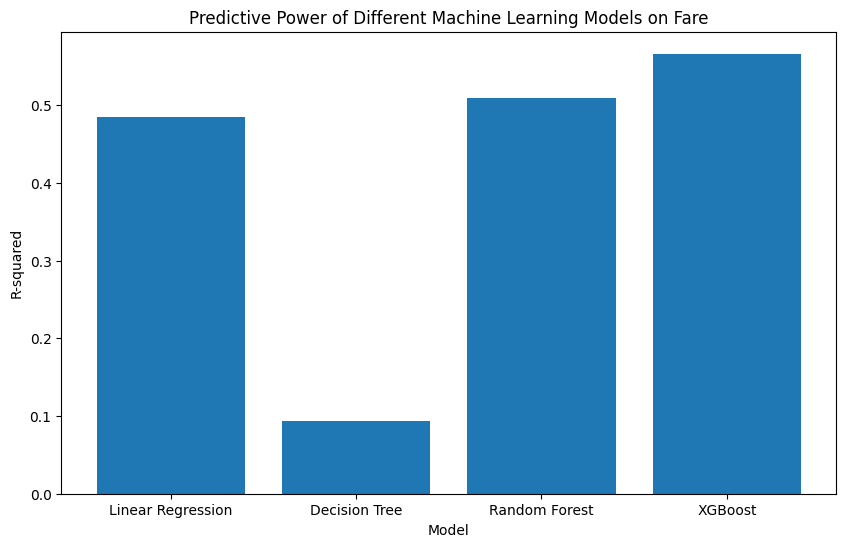

In [31]:

# Separate the features and target variable
X = df[['passenger_count', 'hour', 'day', 'month', 'distance']]
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
models = {'Linear Regression': LinearRegression(),
          'Decision Tree': DecisionTreeRegressor(random_state=42),
          'Random Forest': RandomForestRegressor(random_state=42),
          'XGBoost': XGBRegressor(random_state=42)}

for name, revenue_model in models.items():
    revenue_model.fit(X_train, y_train)
    y_pred = revenue_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} R-squared: {r2:.4f}, MAE: ${mae:.2f}")
    
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models.keys(), [r2_score(y_test, model.predict(X_test)) for model in models.values()])
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
ax.set_title('Predictive Power of Different Machine Learning Models on Fare')
plt.show()

In [32]:
# Train the XGBoost model
fare_model = xgb.XGBRegressor(random_state=42)
fare_model.fit(X_train, y_train)

# Save the XGBoost model to disk
fare_model.save_model('xgb_model.bin')

# Create a function that uses the saved model to predict fare amount
def predict_fare_amount(passenger_count, hour, day_of_week, month, distance):
    # Load the trained model from disk
    fare_model = xgb.Booster()
    fare_model.load_model('xgb_model.bin')

    # Prepare the input data as a Pandas DataFrame
    data = {'passenger_count': [passenger_count],
            'hour': [hour],
            'day_of_week': [day_of_week],
            'month': [month],
            'distance': [distance]}
    df = pd.DataFrame(data)

    # Use the trained model to make a prediction
    prediction = fare_model.predict(xgb.DMatrix(df))[0]

    # Return the predicted fare amount
    return prediction

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Get predictions for the test data
y_pred = []
for row in X_test.itertuples():
    y_pred.append(predict_fare_amount(row.passenger_count, row.hour, row.day, row.month, row.distance))


R2 score: 0.5662479553188325
MAE: 1.6933170810971037
RMSE: 2.536455886192121


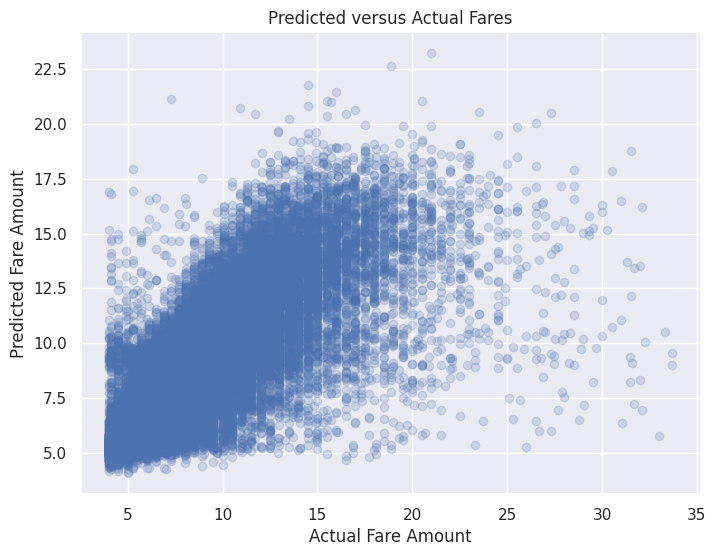

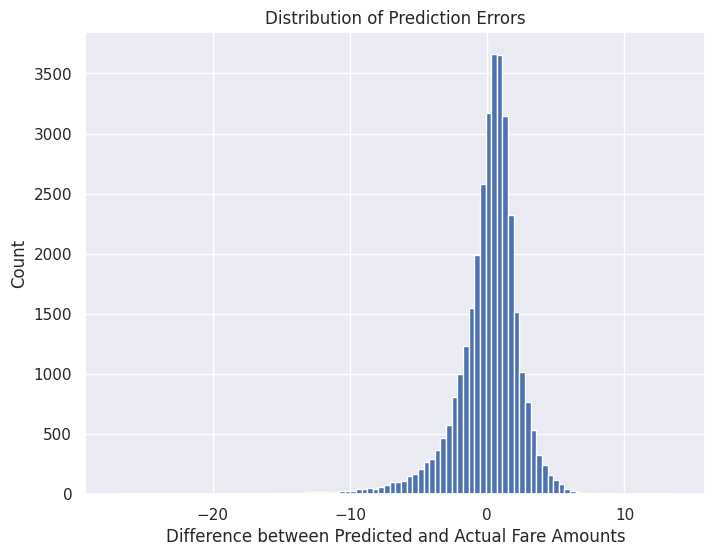

In [36]:
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Predicted versus Actual Fares")
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(y_pred - y_test, bins=100)
plt.xlabel("Difference between Predicted and Actual Fare Amounts")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()


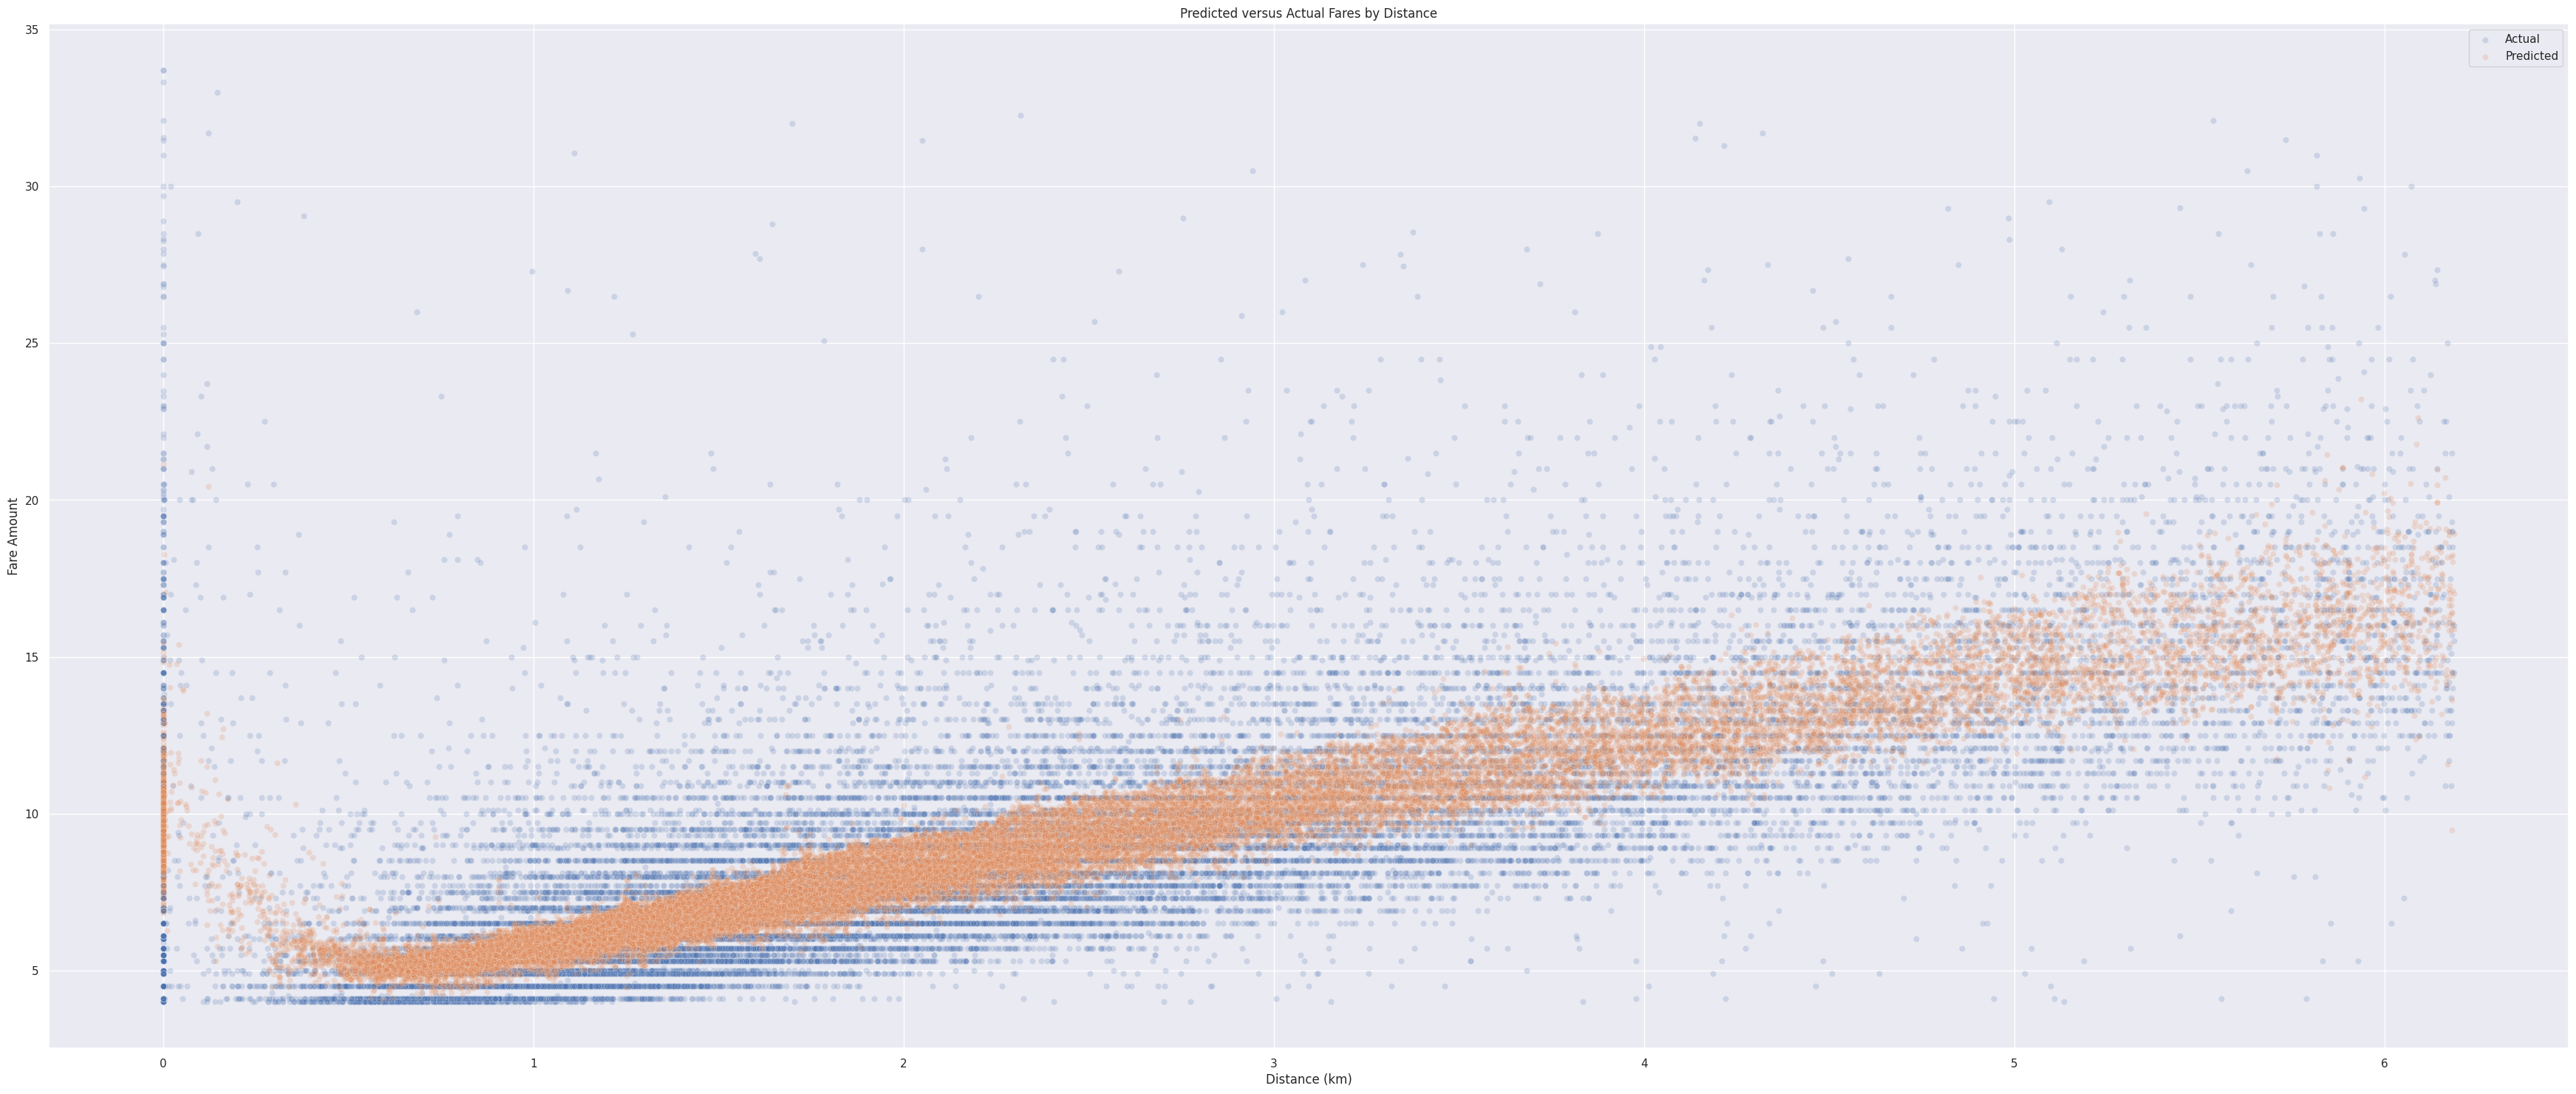

In [37]:
# Add the actual fare_amount to X_test
X_test_with_fares = X_test.copy()
X_test_with_fares['fare_amount'] = y_test

# Make the scatterplot
sns.scatterplot(x='distance', y='fare_amount', data=X_test_with_fares, alpha=0.2)
sns.scatterplot(x='distance', y=y_pred, data=X_test, alpha=0.2)

plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.title("Predicted versus Actual Fares by Distance")
plt.legend(labels=['Actual', 'Predicted'])
plt.show()


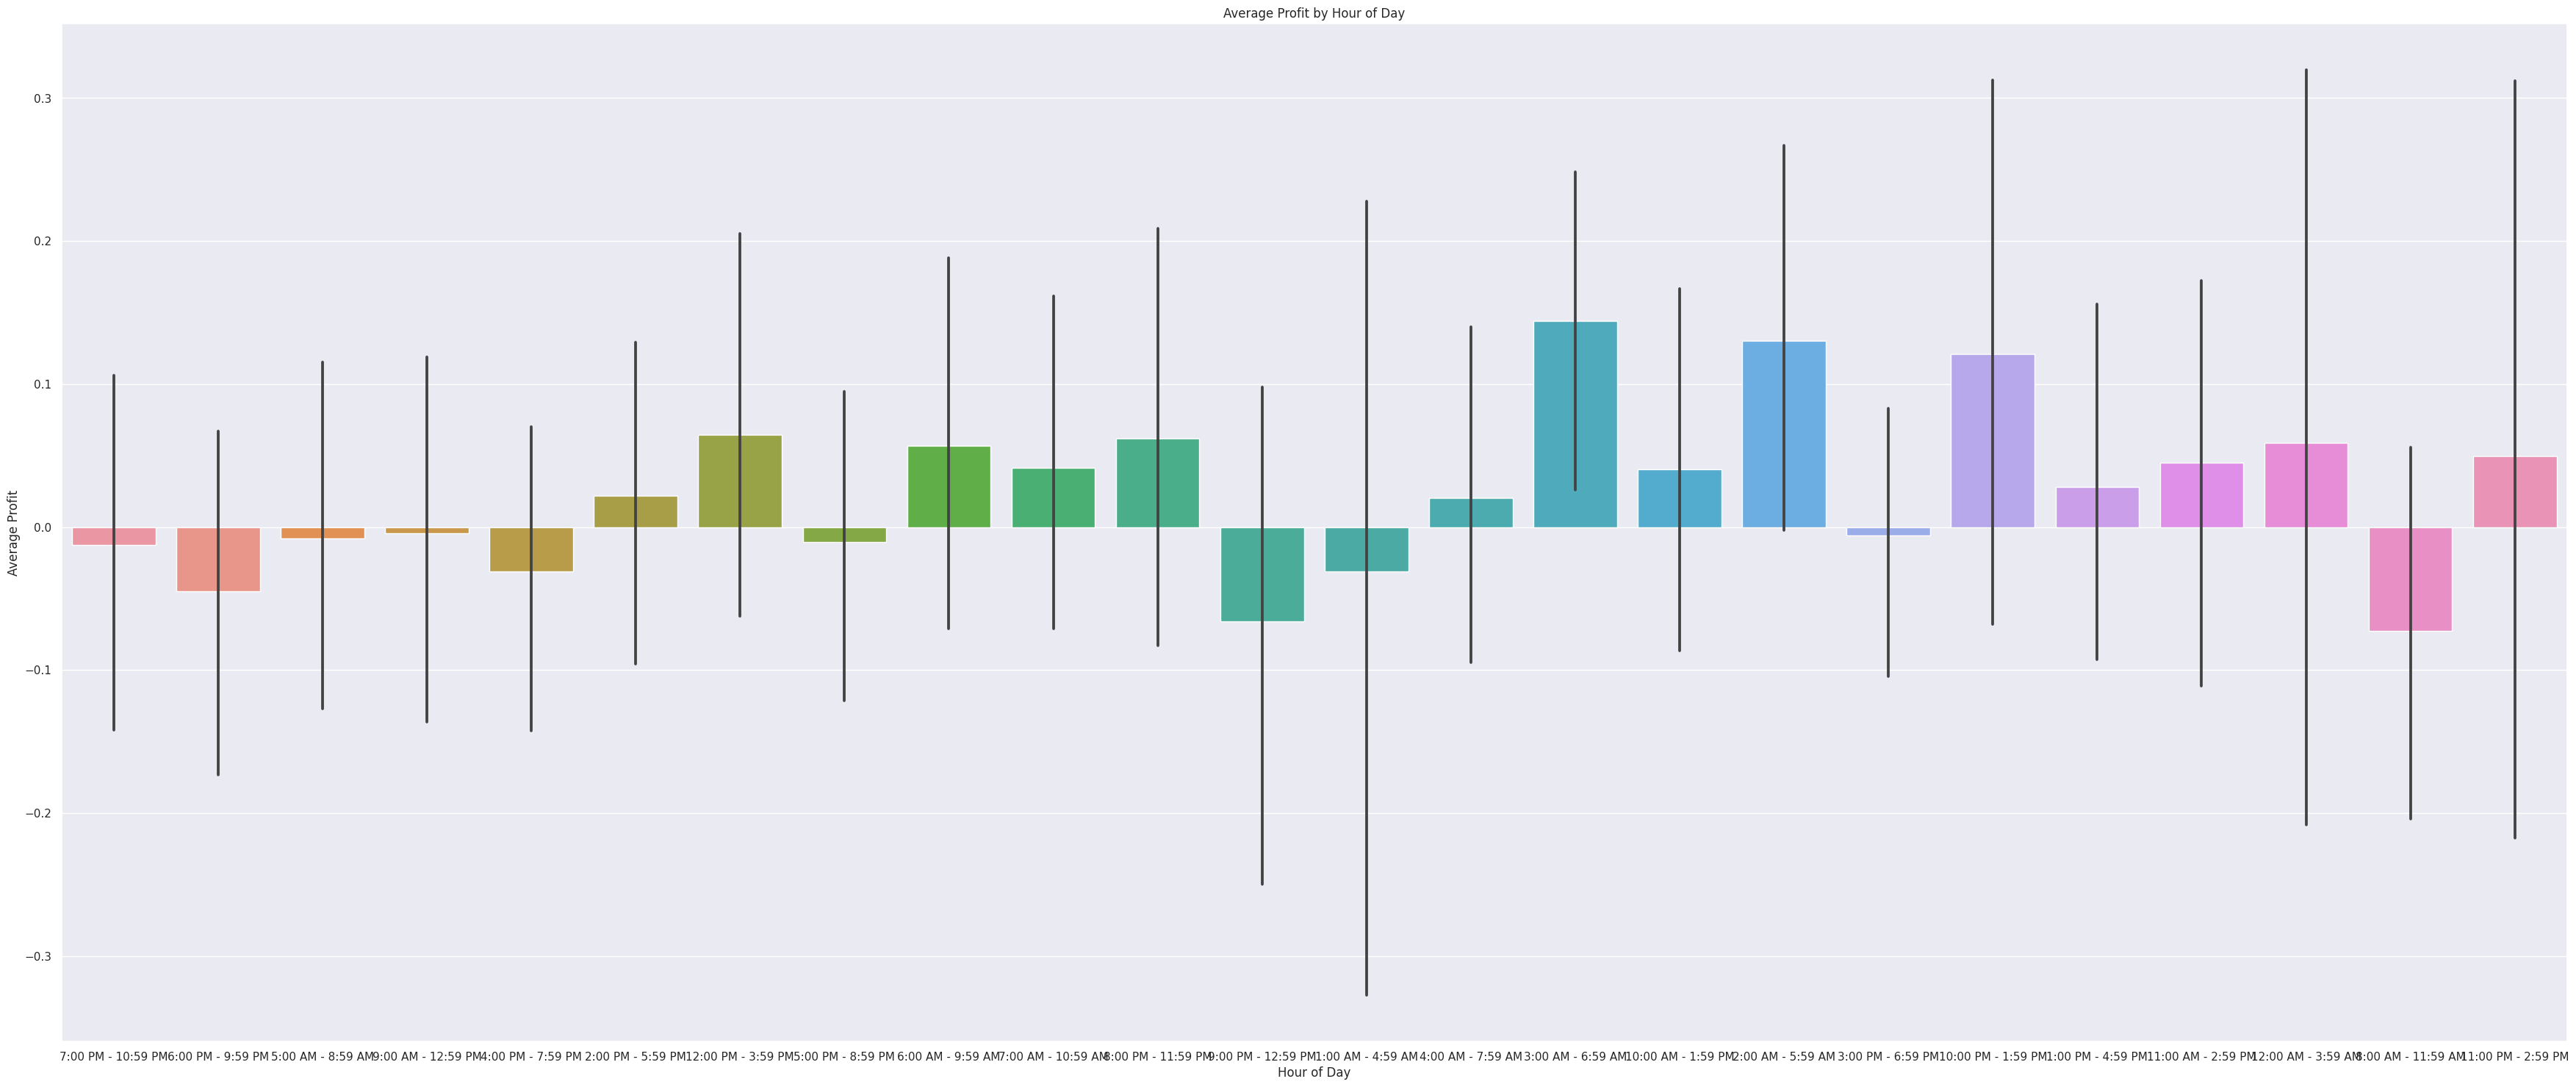

In [38]:
df_eval = X_test.copy()
df_eval['Actual Fare'] = y_test
df_eval['Predicted Fare'] = y_pred
df_eval['Profit'] = df_eval['Predicted Fare'] - df_eval['Actual Fare']
df_eval['Hour'] = df_eval['hour'].apply(lambda x: str((x % 12) or 12) + ':00 ' + ('AM' if x < 12 else 'PM') + ' - ' + str(((x+3) % 12) or 12) + ':59 ' + ('AM' if (x+3) < 12 else 'PM'))

sns.barplot(x='Hour', y='Profit', data=df_eval)
plt.xlabel('Hour of Day')
plt.ylabel('Average Profit')
plt.title('Average Profit by Hour of Day')
plt.show()


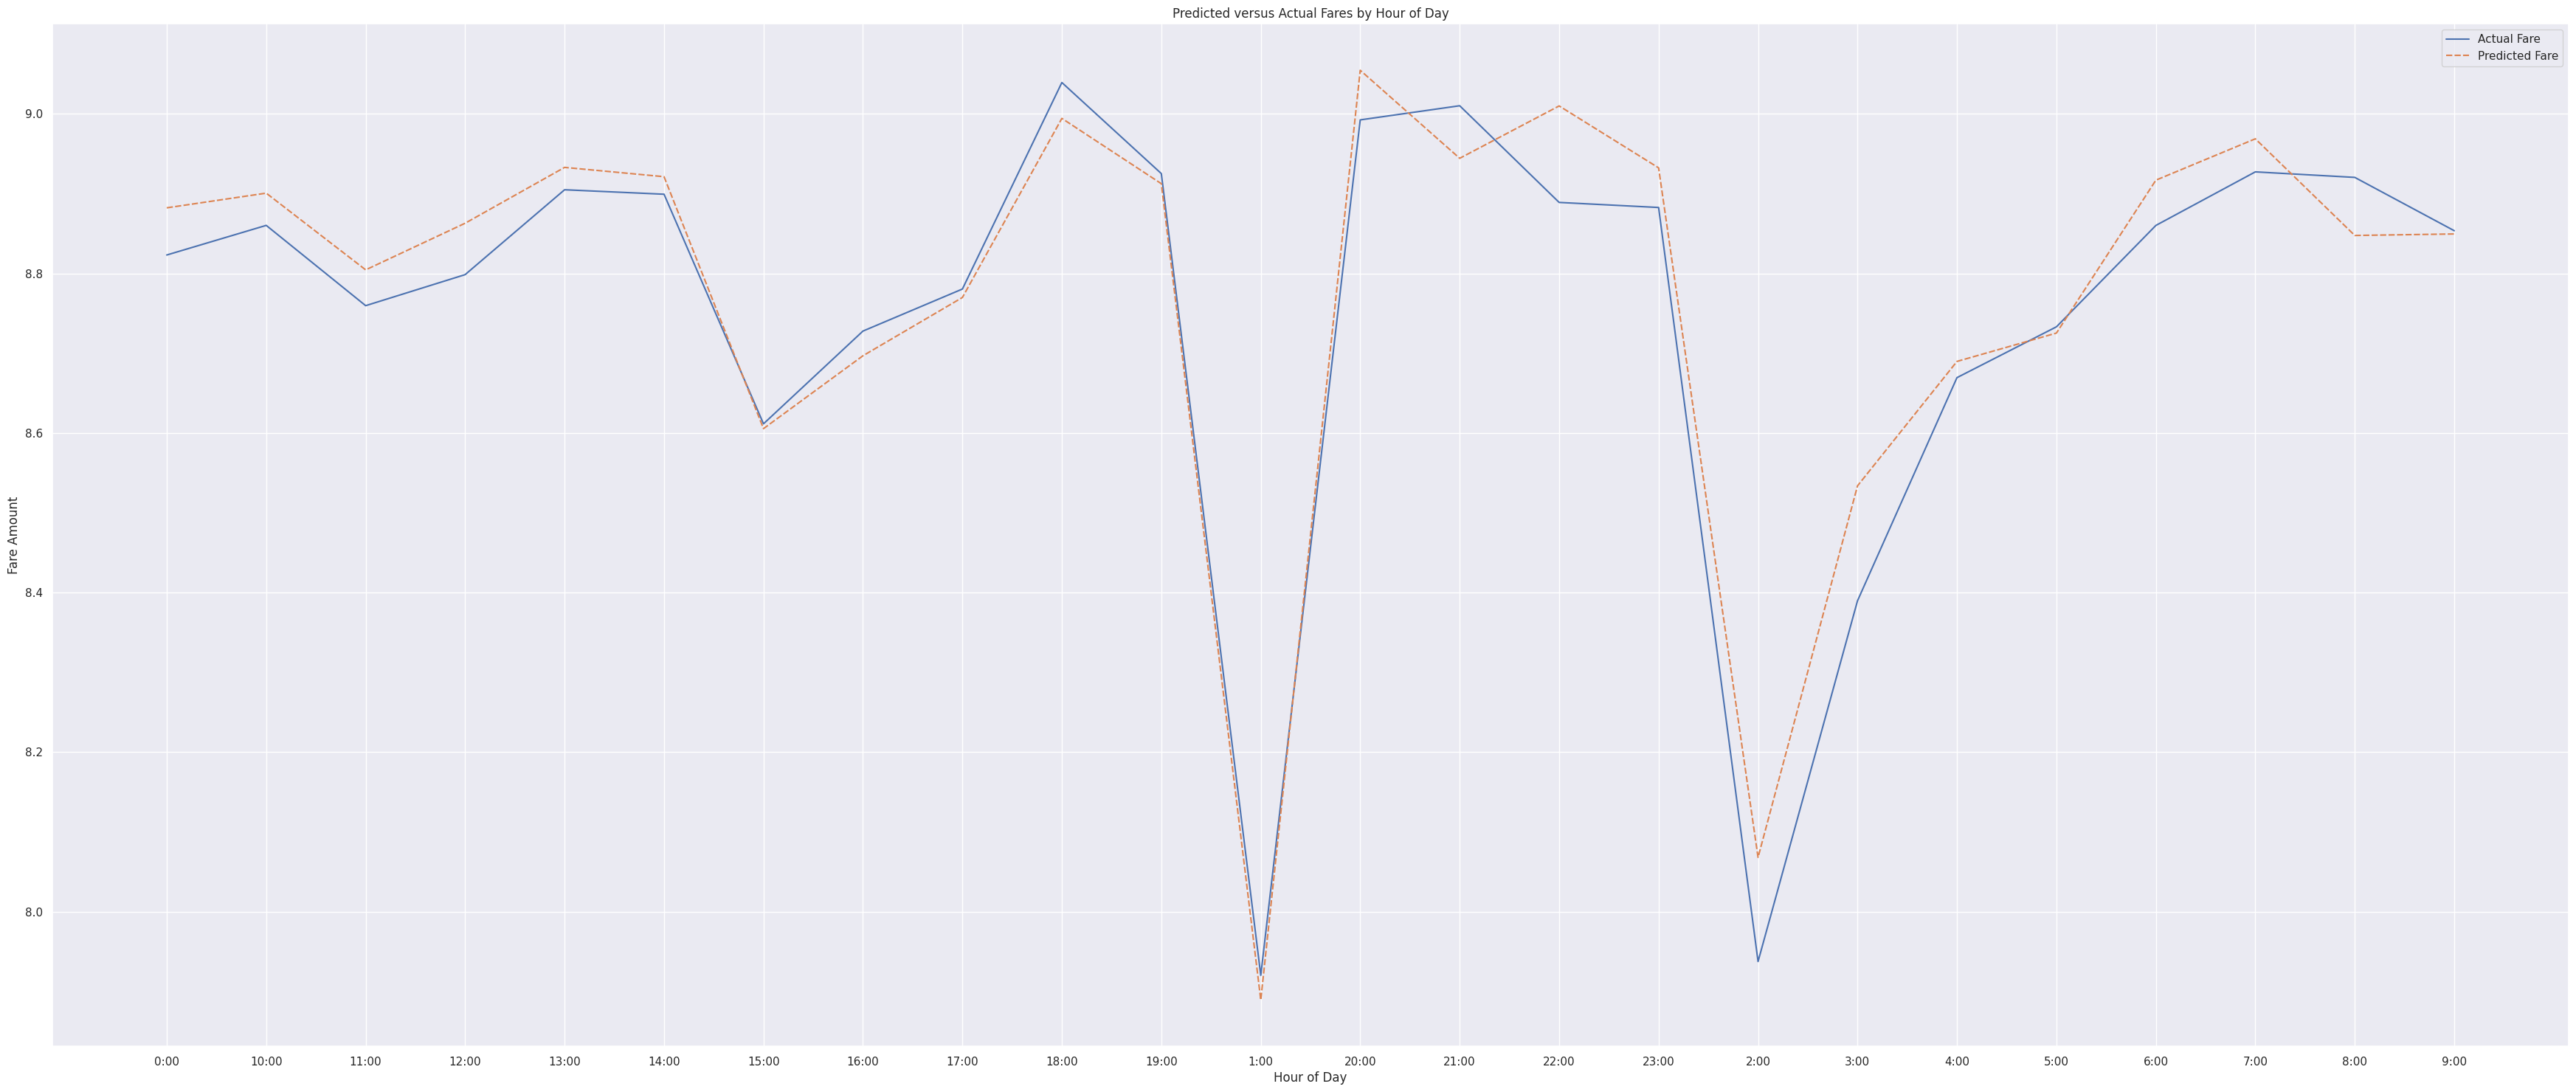

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with the predicted and actual fares and hour of day
df_eval = X_test.copy()
df_eval['Actual Fare'] = y_test
df_eval['Predicted Fare'] = y_pred
df_eval['Hour'] = df_eval['hour'].apply(lambda x: str(x) + ':00')

# Pivot the data to show predicted and actual fares by hour of day
df_pivot = df_eval.pivot_table(values=['Actual Fare', 'Predicted Fare'], index='Hour', aggfunc='mean')

# Create a line plot of predicted and actual fares by hour of day
sns.lineplot(data=df_pivot)
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount')
plt.title('Predicted versus Actual Fares by Hour of Day')
plt.show()


In [41]:
evaluate_predictions(predict_fare_amount, X_test, y_test)

R-squared score: 0.5662
Mean absolute error: 1.6933
Mean squared error: 6.4336
Root mean squared error: 2.5365
MAPE: 0.1954
MDAE: 1.1898
